In [1]:
import pandas as pd
from faker import Faker
import random

# Initialize Faker to generate fake data
fake = Faker()

# Create a significant number of records (1000 reviews)
n_reseñas = 1000

# Generate fake data for the review dataset
data_reseñas = {
    "id_reseña": [fake.uuid4() for _ in range(n_reseñas)],
    "producto": [fake.random_element(elements=('Smartphone', 'Laptop', 'Audífonos', 'Reloj Inteligente', 'Tablet')) for _ in range(n_reseñas)],
    "reseña": [fake.text(max_nb_chars=200) for _ in range(n_reseñas)],
    "calificación": [random.randint(1, 5) for _ in range(n_reseñas)],  # Ratings between 1 and 5
    "fecha": [fake.date_time_this_year().strftime('%Y-%m-%d') for _ in range(n_reseñas)],
}

# Create DataFrame with generated data
df_reseñas = pd.DataFrame(data_reseñas)

# Introduce null values randomly in some reviews
nulos_indices = random.sample(range(n_reseñas), 50)  # Choose 50 random reviews to be null
df_reseñas.loc[nulos_indices, 'reseña'] = None

# Display the first few rows to verify
print(df_reseñas.head())

# Optionally save the dataset to a CSV file
df_reseñas.to_csv('reseñas.csv', index=False)


                              id_reseña           producto  \
0  042b8bc7-17a9-4f26-8a36-491b56170b48  Reloj Inteligente   
1  b0248ca3-4993-47da-98f5-bd5200ab50ce          Audífonos   
2  b6c2f490-2327-400b-b68d-e7c9ac275e3e         Smartphone   
3  c8e3ba38-6de2-40d0-9be5-74dd98f3f2e6          Audífonos   
4  c64680fd-8fa5-44f2-813e-b26827d4f8c9  Reloj Inteligente   

                                              reseña  calificación       fecha  
0  Real some benefit specific alone effect. Under...             3  2024-04-27  
1  Nation girl loss.\nProject Mr set must debate....             5  2024-05-27  
2  Social page pretty black. Onto food move wear ...             4  2024-10-11  
3  Yes word poor wear. Management arrive its back...             2  2024-02-28  
4  Newspaper military since recently management. ...             4  2024-07-10  


In [18]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer


In [2]:
# Ruta del archivo CSV
ruta_archivo = 'C:/Users/USUARIO/OneDrive/Desktop/Análisis de Datos/Módulo Técnico/Semana 3/reseñas.csv'  # Cambiar a la ruta local si es necesario
df = pd.read_csv(ruta_archivo)

# Mostrar las primeras filas del DataFrame
df.head()

,id_reseña,producto,reseña,calificación,fecha
0,042b8bc7-17a9-4f26-8a36-491b56170b48,Reloj Inteligente,Real some benefit specific alone effect. Under...,3,2024-04-27
1,b0248ca3-4993-47da-98f5-bd5200ab50ce,Audífonos,Nation girl loss.\nProject Mr set must debate....,5,2024-05-27
2,b6c2f490-2327-400b-b68d-e7c9ac275e3e,Smartphone,Social page pretty black. Onto food move wear ...,4,2024-10-11
3,c8e3ba38-6de2-40d0-9be5-74dd98f3f2e6,Audífonos,Yes word poor wear. Management arrive its back...,2,2024-02-28
4,c64680fd-8fa5-44f2-813e-b26827d4f8c9,Reloj Inteligente,Newspaper military since recently management. ...,4,2024-07-10


In [9]:
# Importar stopwords y herramientas de procesamiento de texto
import nltk
nltk.download('vader_lexicon')
nltk.download('stopwords')
from nltk.corpus import stopwords
import re

# Limpiar el texto: eliminar símbolos y convertir a minúsculas
def limpiar_texto(texto):
    # Handle None values by returning an empty string or a placeholder
    if texto is None:
        return ''  # Or any other suitable placeholder
    texto = re.sub(r'[^A-Za-z\s]', '', texto.lower())
    texto = ' '.join([palabra for palabra in texto.split() if palabra not in stopwords.words('english')])
    return texto

df_reseñas['reseña_limpia'] = df_reseñas['reseña'].apply(limpiar_texto)

# Ver los resultados de la limpieza
df_reseñas[['reseña', 'reseña_limpia']].head()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\USUARIO\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\USUARIO\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,reseña,reseña_limpia
0,Real some benefit specific alone effect. Under...,real benefit specific alone effect budget succ...
1,Nation girl loss.\nProject Mr set must debate....,nation girl loss project mr set must debate tr...
2,Social page pretty black. Onto food move wear ...,social page pretty black onto food move wear o...
3,Yes word poor wear. Management arrive its back...,yes word poor wear management arrive back thou...
4,Newspaper military since recently management. ...,newspaper military since recently management d...


In [19]:
sia = SentimentIntensityAnalyzer()

# Función para analizar el sentimiento
def obtener_sentimiento(texto):
    return sia.polarity_scores(texto)

# Aplicar la función a las reseñas limpias
df_reseñas['sentimiento'] = df_reseñas['reseña_limpia'].apply(obtener_sentimiento)

# Extraer la clasificación de sentimiento (positivo, negativo, neutro)
df_reseñas['clasificación'] = df_reseñas['sentimiento'].apply(lambda x: 'positivo' if x['compound'] > 0 else 'negativo' if x['compound'] < 0 else 'neutro')

# Mostrar la clasificación
df_reseñas[['reseña_limpia', 'clasificación']].head()


,reseña_limpia,clasificación
0,real benefit specific alone effect budget succ...,positivo
1,nation girl loss project mr set must debate tr...,negativo
2,social page pretty black onto food move wear o...,positivo
3,yes word poor wear management arrive back thou...,negativo
4,newspaper military since recently management d...,positivo


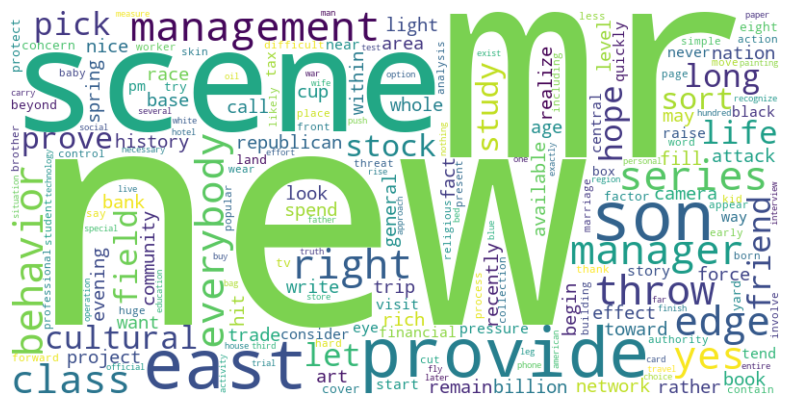

In [20]:
# Generar WordCloud
texto_completo = ' '.join(df_reseñas['reseña_limpia'].tolist())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(texto_completo)

# Mostrar el WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


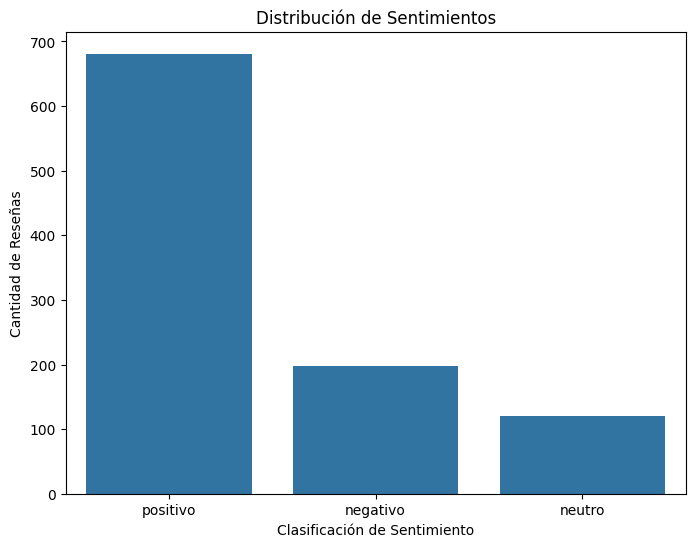

In [21]:
# Gráfico de barras del sentimiento
plt.figure(figsize=(8, 6))
sns.countplot(data=df_reseñas, x='clasificación')
plt.title('Distribución de Sentimientos')
plt.xlabel('Clasificación de Sentimiento')
plt.ylabel('Cantidad de Reseñas')
plt.show()

In [22]:
# Hora actual de Bogotá

from datetime import datetime
import pytz

def get_bogota_time():
  """Returns the current time in Bogota."""
  bogota_tz = pytz.timezone('America/Bogota')
  bogota_now = datetime.now(bogota_tz)
  return bogota_now

current_time_bogota = get_bogota_time()
print(f"La hora actual en Bogotá es: {current_time_bogota}")

La hora actual en Bogotá es: 2024-10-22 20:26:25.426898-05:00


In [23]:
import schedule
import time
from datetime import datetime
import pytz
import pandas as pd
import random
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter
from nltk.corpus import stopwords
import nltk

# Descargar los stopwords si no están ya descargados
nltk.download('stopwords')

# Configurar zona horaria Bogotá
bogota_tz = pytz.timezone("America/Bogota")

# Fase 1: Cargar datos (simulación de dataset de reseñas)
def cargar_datos():
    # Simulación de un dataset pequeño
    data_reseñas = {
        "id_reseña": [f"rev_{i}" for i in range(1, 101)],
        "producto": [random.choice(['Smartphone', 'Laptop', 'Tablet']) for _ in range(100)],
        "reseña": [random.choice(['Buen producto', 'Muy malo', 'Excelente', 'No sirve', 'Falla mucho']) for _ in range(100)],
        "calificación": [random.randint(1, 5) for _ in range(100)],  # Calificaciones entre 1 y 5
        "fecha": pd.date_range(end=pd.Timestamp.now(), periods=100).strftime('%Y-%m-%d')
    }
    df_reseñas = pd.DataFrame(data_reseñas)
    print("Datos cargados.")
    return df_reseñas

# Fase 2: Limpiar datos
def limpiar_datos(df):
    # Eliminamos valores nulos
    df = df.dropna(subset=['reseña'])

    # Convertimos a minúsculas y eliminamos stopwords
    stop_words = set(stopwords.words('spanish'))
    df['reseña_limpia'] = df['reseña'].apply(lambda x: ' '.join([word for word in x.lower().split() if word not in stop_words]))

    print("Datos limpiados.")
    return df

# Fase 3: Análisis de texto (conteo de palabras)
def analisis_texto(df):
    # Contar palabras más comunes
    palabras = ' '.join(df['reseña_limpia']).split()
    contador = Counter(palabras)
    palabras_comunes = contador.most_common(10)

    print("Análisis de texto completado. Palabras más comunes:", palabras_comunes)
    return palabras_comunes

# Fase 4: Visualización (Wordcloud)
def visualizar_datos(df):
    texto = ' '.join(df['reseña_limpia'])

    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(texto)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

    print("Visualización completada.")

# Función principal para ejecutar todo el análisis
def ejecutar_analisis_texto():
    current_time = datetime.now(bogota_tz).strftime("%Y-%m-%d %H:%M:%S")
    print(f"Ejecutando análisis de texto en: {current_time}")

    # Llamar a las fases del análisis
    df_reseñas = cargar_datos()     # Cargar datos
    df_limpio = limpiar_datos(df_reseñas)  # Limpiar datos
    analisis_texto(df_limpio)  # Realizar análisis de texto
    visualizar_datos(df_limpio)  # Visualización de resultados

# Programar la ejecución diaria a las 8:00 AM en horario Bogotá
def check_bogota_time():
    current_time = datetime.now(bogota_tz).strftime("%H:%M")
    if current_time == "19:03":
        ejecutar_analisis_texto()

# Ejecutar la función cada minuto para verificar si son las 8:00 AM en Bogotá
while True:
    check_bogota_time()
    time.sleep(0.5)  # Esperar un minuto antes de volver a verificar


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\USUARIO\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


KeyboardInterrupt: 